### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from glob import glob
%matplotlib inline

### Data Exploration

In [2]:
# Reading the train and test meta-data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Image_name,attrib_01,attrib_02,attrib_03,attrib_04,attrib_05,attrib_06,attrib_07,attrib_08,attrib_09,...,attrib_76,attrib_77,attrib_78,attrib_79,attrib_80,attrib_81,attrib_82,attrib_83,attrib_84,attrib_85
0,Image-1.jpg,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Image-2.jpg,1,0,0,1,0,0,1,1,0,...,1,1,1,1,0,0,0,1,0,1
2,Image-3.jpg,1,0,0,1,0,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1
3,Image-4.jpg,1,0,0,1,0,0,0,0,1,...,1,0,1,1,1,0,0,0,0,0
4,Image-5.jpg,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
# Shape of training and test datasets
print ('Training dataset consists of {} images with {} attributes'.format(train.shape[0], train.shape[1]-1))
# Shape of training and test datasets
print ('Testing dataset consists of {} images.'.format(test.shape[0]))

Training dataset consists of 12600 images with 85 attributes
Testing dataset consists of 5400 images.


Let's have a look at the columns of the training data.

In [5]:
print('Columns in the dataset:\n\n', train.columns)

Columns in the dataset:

 Index(['Image_name', 'attrib_01', 'attrib_02', 'attrib_03', 'attrib_04',
       'attrib_05', 'attrib_06', 'attrib_07', 'attrib_08', 'attrib_09',
       'attrib_10', 'attrib_11', 'attrib_12', 'attrib_13', 'attrib_14',
       'attrib_15', 'attrib_16', 'attrib_17', 'attrib_18', 'attrib_19',
       'attrib_20', 'attrib_21', 'attrib_22', 'attrib_23', 'attrib_24',
       'attrib_25', 'attrib_26', 'attrib_27', 'attrib_28', 'attrib_29',
       'attrib_30', 'attrib_31', 'attrib_32', 'attrib_33', 'attrib_34',
       'attrib_35', 'attrib_36', 'attrib_37', 'attrib_38', 'attrib_39',
       'attrib_40', 'attrib_41', 'attrib_42', 'attrib_43', 'attrib_44',
       'attrib_45', 'attrib_46', 'attrib_47', 'attrib_48', 'attrib_49',
       'attrib_50', 'attrib_51', 'attrib_52', 'attrib_53', 'attrib_54',
       'attrib_55', 'attrib_56', 'attrib_57', 'attrib_58', 'attrib_59',
       'attrib_60', 'attrib_61', 'attrib_62', 'attrib_63', 'attrib_64',
       'attrib_65', 'attrib_66', 'att

###  Data Visualization

Now we will visualize our data to get a better understanding of it.

We will begin with visualizing the distribution of the labels in the training data.

In [6]:
cols = list(train.columns)
cols.remove('Image_name')
cols.sort()

In [7]:
count_labels = train[cols].sum()

In [8]:
count_labels.sort_values(inplace=True)

From the figure below, we can see that there are 85 different attributes/ labels and Attrib_21 is common in almost all animals while Attrib_66 is rare.

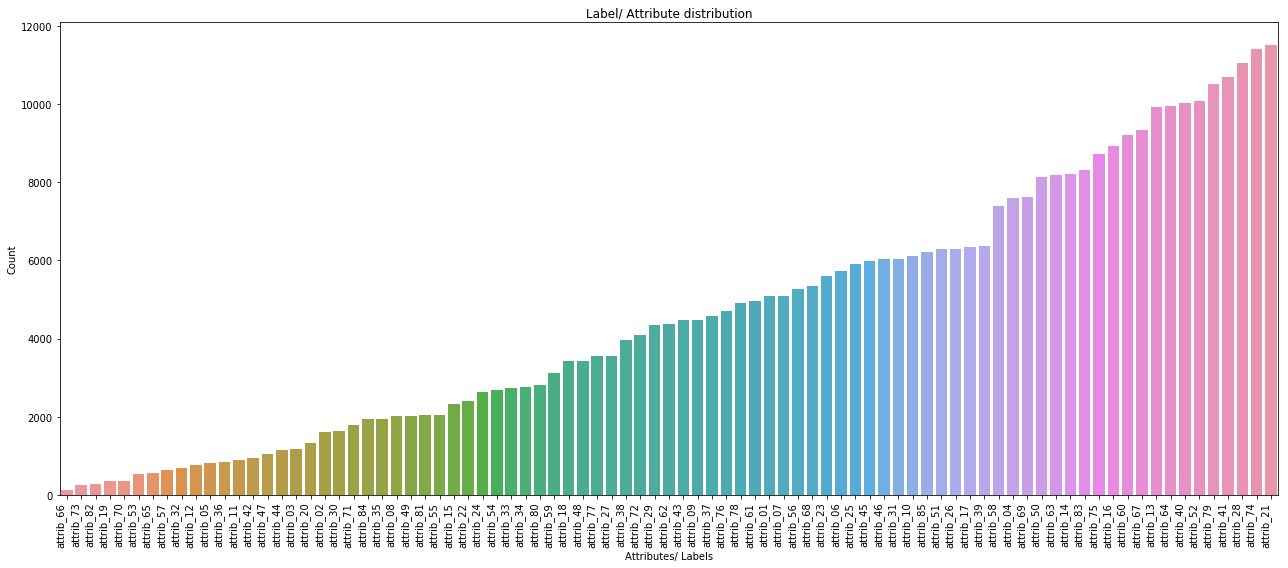

In [9]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x=count_labels.index, y=count_labels.values)
ax.set_xticklabels(labels=count_labels.index,rotation=90, ha='right')
ax.set_ylabel('Count')
ax.set_xlabel('Attributes/ Labels')
ax.title.set_text('Label/ Attribute distribution')
plt.tight_layout()

In [10]:
label_data = np.array(train[cols])

Next we will compute the co-occurrence matrix for the labels. 

In [11]:
# Compute the cooccurrence matrix
cooccurrence_matrix = np.dot(label_data.transpose(), label_data)
print('\n Co-occurence matrix: \n', cooccurrence_matrix)


 Co-occurence matrix: 
 [[5091  728  797 ... 3797  728 2024]
 [ 728 1614    0 ...  669 1614 1003]
 [ 797    0 1188 ... 1188    0  359]
 ...
 [3797  669 1188 ... 8305  743 3629]
 [ 728 1614    0 ...  743 1933 1322]
 [2024 1003  359 ... 3629 1322 6227]]


In [12]:
# Compute the cooccurrence matrix in percentage
# Refrence: https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas/20574460
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide = 'ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal))

In [13]:
print('\n Co-occurrence matrix paercentage: \n', cooccurrence_matrix_percentage)


 Co-occurrence matrix paercentage: 
 [[1.         0.45105328 0.67087542 ... 0.45719446 0.37661666 0.32503613]
 [0.14299745 1.         0.         ... 0.08055388 0.83497155 0.16107275]
 [0.15655078 0.         1.         ... 0.14304636 0.         0.05765216]
 ...
 [0.74582597 0.41449814 1.         ... 1.         0.38437662 0.58278465]
 [0.14299745 1.         0.         ... 0.08946418 1.         0.21230127]
 [0.39756433 0.62143742 0.30218855 ... 0.43696568 0.68391102 1.        ]]


From the plot of the co-occurence matrix (below), we can see which labels(or attributes) genreally occur together.

Text(0.5,1,'Co-occurrence Matrix of the Labels')

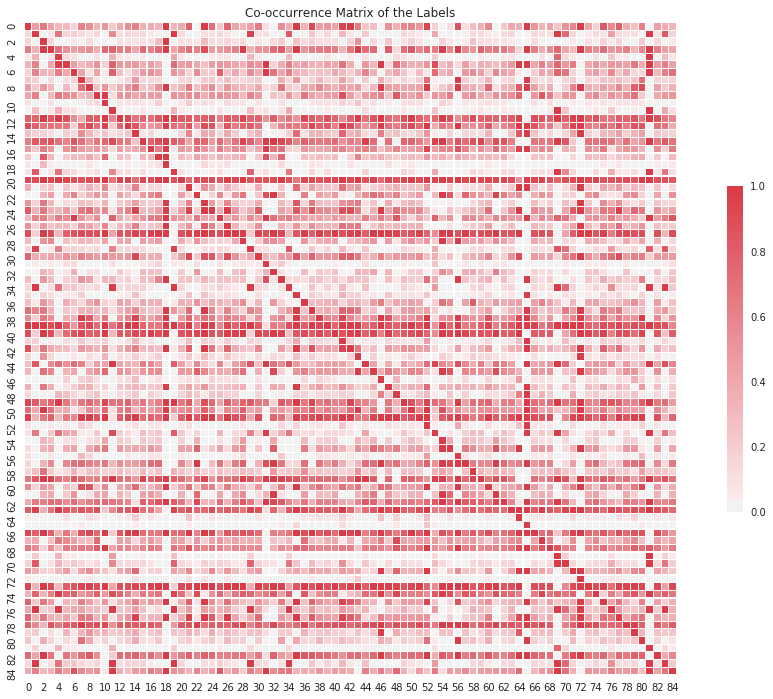

In [14]:
ax = plt.figure(figsize=(18, 12))

sns.set(style='white')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(cooccurrence_matrix_percentage, cmap=cmap, center=0, square=True, linewidths=0.15, cbar_kws={"shrink": 0.5})

plt.title('Co-occurrence Matrix of the Labels')

We define the paths to the image folders.

In [15]:
TRAIN_PATH = 'train_img/'
TEST_PATH = 'test_img/'

In [16]:
img_path = TRAIN_PATH+str(train.Image_name[0])

We import the OpenCV and Python Image library for image manipulation. 

In [17]:
from PIL import Image
import cv2

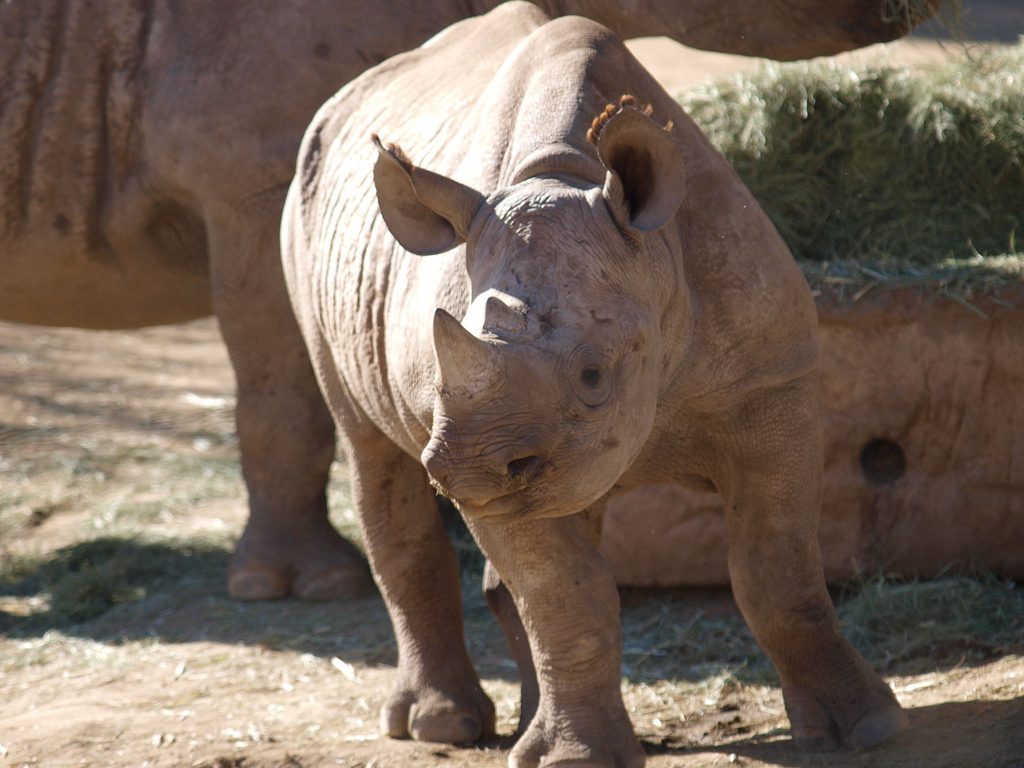

In [18]:
Image.open(img_path)

The computer cannot see shapes or colors. It reads each image as an array of numbers.

In [19]:
img = cv2.imread(img_path)
img

array([[[ 54,  56,  64],
        [ 58,  60,  70],
        [ 59,  64,  73],
        ...,
        [ 70,  65,  62],
        [ 70,  66,  65],
        [ 70,  66,  65]],

       [[ 56,  59,  67],
        [ 59,  61,  71],
        [ 60,  65,  74],
        ...,
        [ 71,  66,  65],
        [ 71,  68,  64],
        [ 71,  68,  64]],

       [[ 59,  62,  70],
        [ 62,  64,  74],
        [ 63,  68,  77],
        ...,
        [ 73,  65,  66],
        [ 71,  66,  63],
        [ 70,  67,  62]],

       ...,

       [[192, 216, 238],
        [190, 214, 236],
        [191, 214, 236],
        ...,
        [ 51,  48,  44],
        [ 47,  42,  39],
        [ 40,  35,  32]],

       [[186, 213, 234],
        [188, 212, 234],
        [187, 211, 233],
        ...,
        [ 55,  52,  48],
        [ 48,  45,  41],
        [ 41,  36,  33]],

       [[178, 205, 226],
        [183, 210, 231],
        [184, 208, 230],
        ...,
        [ 57,  53,  52],
        [ 49,  45,  44],
        [ 40,  37,  33]]

In [20]:
# Shape of each image
img.shape

(768, 1024, 3)

In [21]:
# Extracting label columns
label_cols = list(set(train.columns) - set(['Image_name']))
label_cols.sort()

In [22]:
# Extracting labels corresponding to image at the zeroth index of the training dataset.
labels = train.iloc[0][2:].index[train.iloc[0][2:] == 1]

We plot the Animal and the attributes/ labels corresponding to it.

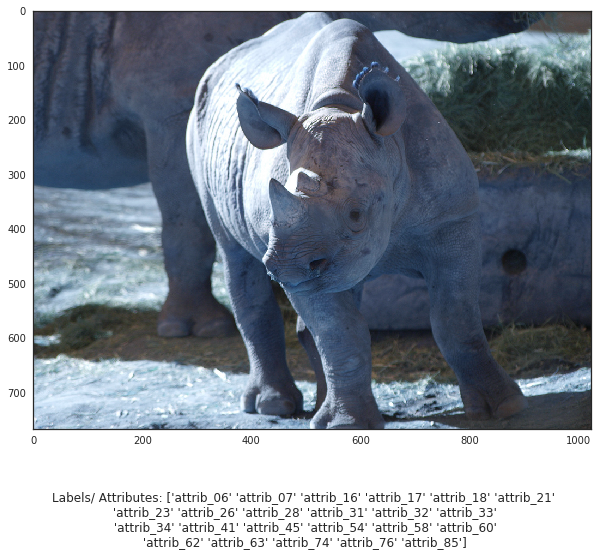

In [23]:
txt = 'Labels/ Attributes: ' + str(labels.values)
ax = plt.figure(figsize=(10, 10))
ax.text(.5, .05, txt, ha='center')
plt.imshow(img)

In the image above we can see a Rhinoceros and all the attributes associated with him.

### Data Preprocessing

Next, we will preprocess our image data before supplying it to the training model.

In [24]:
from tqdm import tqdm
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    return img

The above function reads an image and resizes it to 128 x 128 dimensions and returns it.

In [25]:
#temp = train.sample(frac=0.3)

In [26]:
#train = temp.reset_index(drop=True)

In [27]:
train_img = []
for img_path in tqdm(train.Image_name.values):
    train_img.append(read_img(TRAIN_PATH + img_path))

  3%|▎         | 418/12600 [00:09<04:48, 42.17it/s]/usr/local/lib/python3.5/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 12600/12600 [03:34<00:00, 58.69it/s]


In [28]:
import gc

In [29]:
# Convert the image data into an array. 
# Since the range of color(RGB) is in the range of (0-255).
# Hence by dividing each image by 255, we convert the range to (0.0 - 1.0)

X_train = np.array(train_img, np.float32) / 255.

In [30]:
del train_img
gc.collect()

18450

Next, we will calculate the mean and standard deviation.

In [31]:
mean_img = X_train.mean(axis=0)

In [32]:
std_dev = X_train.std(axis = 0)

Next, we will normalize the image data using the following formula: 

<center>** X = (x - mean of x)/(std. deviation of x)**<center/>


In [33]:
X_norm = (X_train - mean_img)/ std_dev

In [34]:
X_norm.shape

(12600, 128, 128, 3)

In [35]:
del X_train

In [36]:
gc.collect()

0

In [37]:
y = train[label_cols].values

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Finally, we create the training and validation sets.

In [39]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.25, random_state=47)

In [40]:
del X_norm
gc.collect()

0

### Model Architecture

We will be using the Keras framework to create our model. But you may also use other frameworks like Tensorflow, Pytorch, etc.

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


For this problem, we create a model from scratch. We will use a Sequential model, which is a linear stack of layers to build this model.

In [42]:
gc.collect()

0

In [70]:
model = Sequential()
model.add(BatchNormalization(input_shape=Xtrain.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',padding= 'same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(85, activation='sigmoid'))

Here we generate the summary our model. We can see that there are approximately 10 million parameters to train. 

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 64)        36928     
__________

Next, we define our loss function, the optimizer and metrics for our model.

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)

Finally, we train our model.

In [74]:
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=30, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 9450 samples, validate on 3150 samples
Epoch 1/30
9450/9450 [==============================] - 48s 5ms/step - loss: 0.4879 - acc: 0.7551 - val_loss: 0.4635 - val_acc: 0.7697

Epoch 00001: val_loss improved from inf to 0.46354, saving model to weights.best.eda.hdf5
Epoch 2/30
9450/9450 [==============================] - 26s 3ms/step - loss: 0.4571 - acc: 0.7732 - val_loss: 0.4459 - val_acc: 0.7807

Epoch 00002: val_loss improved from 0.46354 to 0.44588, saving model to weights.best.eda.hdf5
Epoch 3/30
9450/9450 [==============================] - 26s 3ms/step - loss: 0.4463 - acc: 0.7799 - val_loss: 0.4352 - val_acc: 0.7868

Epoch 00003: val_loss improved from 0.44588 to 0.43516, saving model to weights.best.eda.hdf5
Epoch 4/30
9450/9450 [==============================] - 26s 3ms/step - loss: 0.4361 - acc: 0.7860 - val_loss: 0.4215 - val_acc: 0.7954

Epoch 00004: val_loss improved from 0.43516 to 0.42154, saving model to weights.best.eda.hdf5
Epoch 5/30
9450/9450 [==============

In [75]:
train_pred = model.predict(Xtrain).round()

In [76]:
f1_score(ytrain, train_pred, average='samples')

0.8287808332727035

In [77]:
valid_pred = model.predict(Xvalid).round()

In [78]:
f1_score(yvalid, valid_pred, average='samples')

0.7831132763742454

In [79]:
#del Xtrain
#del Xvalid
#del ytrain 
#del yvalid
gc.collect()

12432

### Prediction on Test Set

Now that we have built and trained our model, we will use it to predict the labels of the test images.

In [80]:
from sklearn.metrics import f1_score

In [54]:
test_img = []
for img_path in tqdm(test.Image_name.values):
    test_img.append(read_img(TEST_PATH + img_path))

  8%|▊         | 426/5400 [00:09<01:56, 42.80it/s]/usr/local/lib/python3.5/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 5400/5400 [01:26<00:00, 62.26it/s]


In [55]:
X_test = np.array(test_img, np.float32) / 255.

In [56]:
del test_img
gc.collect()

111

The test images are normalized below.

In [57]:
mean_img = X_test.mean(axis=0)

In [58]:
std_dev = X_test.std(axis = 0)

In [59]:
X_norm_test = (X_test - mean_img)/ std_dev

In [60]:
del X_test
gc.collect()

0

Predict the labels on the test images.

In [81]:
model.load_weights('weights.best.eda.hdf5')

In [82]:
pred_test = model.predict(X_norm_test).round()

In [83]:
pred_test = pred_test.astype(np.int)

#### Creating the submission file

In [84]:
subm = pd.DataFrame()

In [85]:
subm['Image_name'] = test.Image_name

In [86]:
label_df = pd.DataFrame(data=pred_test, columns=label_cols)

In [87]:
subm = pd.concat([subm, label_df], axis=1)

In [88]:
subm.to_csv('submit_4.csv', index=False)


In [89]:
subm.head()


,Image_name,attrib_01,attrib_02,attrib_03,attrib_04,attrib_05,attrib_06,attrib_07,attrib_08,attrib_09,...,attrib_76,attrib_77,attrib_78,attrib_79,attrib_80,attrib_81,attrib_82,attrib_83,attrib_84,attrib_85
0,Image-1.jpg,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
1,Image-2.jpg,0,1,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,1
2,Image-3.jpg,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,Image-4.jpg,1,0,0,0,0,1,0,1,1,...,1,0,1,1,1,1,0,1,0,1
4,Image-5.jpg,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


END.....